In [14]:
# !pip install numpy
# !pip install tensorflow==2.3.0
# !pip install scikit-learn
# !pip install visualkeras

ERROR: Could not find a version that satisfies the requirement tensorflow==2.3.0 (from versions: 2.13.0rc0, 2.13.0rc1, 2.13.0rc2, 2.13.0, 2.13.1, 2.14.0rc0, 2.14.0rc1, 2.14.0, 2.14.1, 2.15.0rc0, 2.15.0rc1, 2.15.0, 2.15.1, 2.16.0rc0, 2.16.1)
ERROR: No matching distribution found for tensorflow==2.3.0


In [1]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
import pandas
RANDOM_SEED = 42

# Specify each path

In [2]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

# Set number of classes

In [3]:
NUM_CLASSES = 6

# Dataset reading

In [4]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [5]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [8]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)
model.built = True

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 42)                0         
                                                                 
 dense (Dense)               (None, 20)                860       
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 6)                 66        
                                                                 
Total params: 1136 (4.44 KB)
Trainable params: 1136 (4.44 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [9]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)


In [10]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [11]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
 1/32 [..............................] - ETA: 5s - loss: 2.0032 - accuracy: 0.0938
Epoch 1: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
32/32 [==============================] - 0s 4ms/step - loss: 1.8613 - accuracy: 0.1749 - val_loss: 1.7459 - val_accuracy: 0.2965
Epoch 2/1000
 1/32 [..............................] - ETA: 0s - loss: 1.7671 - accuracy: 0.2891
Epoch 2: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
32/32 [==============================] - 0s 1ms/step - loss: 1.7377 - accuracy: 0.2872 - val_loss: 1.6498 - val_accuracy: 0.4010
Epoch 3/1000
 1/32 [..............................] - ETA: 0s - loss: 1.7055 - accuracy: 0.2734
Epoch 3: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
32/32 [==============================] - 0s 1ms/step - loss: 1.6646 - accuracy: 0.3328 - val_loss: 1.5636 - val_accuracy: 0.4577
Epoch 4/1000
 1/32 [..............................] - ETA: 0s - loss: 1.6350 - accuracy: 0.3594
E

/Users/shrijayan.rajendran/Desktop/hand-gesture-recognition-mediapipe/hand_env/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 7: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
32/32 [==============================] - 0s 1ms/step - loss: 1.4194 - accuracy: 0.4533 - val_loss: 1.2666 - val_accuracy: 0.5762
Epoch 8/1000
 1/32 [..............................] - ETA: 0s - loss: 1.3817 - accuracy: 0.4844
Epoch 8: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
32/32 [==============================] - 0s 1ms/step - loss: 1.3753 - accuracy: 0.4785 - val_loss: 1.2088 - val_accuracy: 0.6130
Epoch 9/1000
 1/32 [..............................] - ETA: 0s - loss: 1.3814 - accuracy: 0.4688
Epoch 9: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
32/32 [==============================] - 0s 1ms/step - loss: 1.3390 - accuracy: 0.4908 - val_loss: 1.1467 - val_accuracy: 0.6336
Epoch 10/1000
 1/32 [..............................] - ETA: 0s - loss: 1.3011 - accuracy: 0.5391
Epoch 10: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
32/32 [===========

In [12]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

11/11 [==============================] - 0s 542us/step - loss: 0.3231 - accuracy: 0.9389


In [13]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [14]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 46ms/step
[0.03308327 0.05374619 0.85823685 0.00109863 0.02900428 0.02483074]
2


# Confusion matrix

43/43 [==============================] - 0s 341us/step


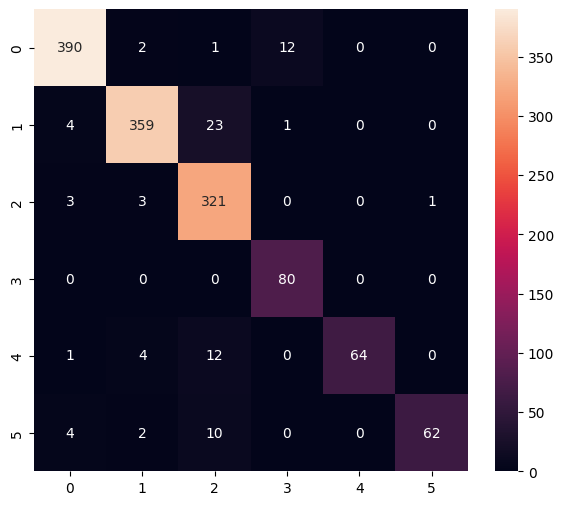

Classification Report
              precision    recall  f1-score   support

           0       0.97      0.96      0.97       405
           1       0.97      0.93      0.95       387
           2       0.87      0.98      0.92       328
           3       0.86      1.00      0.92        80
           4       1.00      0.79      0.88        81
           5       0.98      0.79      0.88        78

    accuracy                           0.94      1359
   macro avg       0.94      0.91      0.92      1359
weighted avg       0.94      0.94      0.94      1359



In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [17]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

/Users/shrijayan.rajendran/Desktop/hand-gesture-recognition-mediapipe/hand_env/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [18]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: /var/folders/h4/8l1qm8k97mn4whg778yd7ckw0000gn/T/tmpbic_xjsx/assets


INFO:tensorflow:Assets written to: /var/folders/h4/8l1qm8k97mn4whg778yd7ckw0000gn/T/tmpbic_xjsx/assets
2024-06-06 19:59:21.723732: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:364] Ignored output_format.
2024-06-06 19:59:21.723756: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:367] Ignored drop_control_dependency.
2024-06-06 19:59:21.724004: I tensorflow/cc/saved_model/reader.cc:45] Reading SavedModel from: /var/folders/h4/8l1qm8k97mn4whg778yd7ckw0000gn/T/tmpbic_xjsx
2024-06-06 19:59:21.724568: I tensorflow/cc/saved_model/reader.cc:91] Reading meta graph with tags { serve }
2024-06-06 19:59:21.724573: I tensorflow/cc/saved_model/reader.cc:132] Reading SavedModel debug info (if present) from: /var/folders/h4/8l1qm8k97mn4whg778yd7ckw0000gn/T/tmpbic_xjsx
2024-06-06 19:59:21.726034: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:375] MLIR V1 optimization pass is not enabled
2024-06-06 19:59:21.726740: I tensorflow/cc/saved_model/load

6636

# Inference test

In [19]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


In [20]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [21]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [22]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: user 257 µs, sys: 194 µs, total: 451 µs
Wall time: 327 µs


In [23]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[0.03308327 0.05374619 0.85823685 0.00109863 0.02900427 0.02483074]
2
